In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./데이터/casting.csv', encoding='cp949')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    92015 non-null  int64  
 1   line                          92015 non-null  object 
 2   name                          92015 non-null  object 
 3   mold_name                     92015 non-null  object 
 4   time                          92015 non-null  object 
 5   date                          92015 non-null  object 
 6   count                         92015 non-null  int64  
 7   working                       92014 non-null  object 
 8   emergency_stop                92014 non-null  object 
 9   molten_temp                   89754 non-null  float64
 10  facility_operation_cycleTime  92015 non-null  int64  
 11  production_cycletime          92015 non-null  int64  
 12  low_section_speed             92014 non-null  float64
 13  h

In [4]:
train.isnull().sum()

Unnamed: 0                          0
line                                0
name                                0
mold_name                           0
time                                0
date                                0
count                               0
working                             1
emergency_stop                      1
molten_temp                      2261
facility_operation_cycleTime        0
production_cycletime                0
low_section_speed                   1
high_section_speed                  1
molten_volume                   45130
cast_pressure                       1
biscuit_thickness                   1
upper_mold_temp1                    1
upper_mold_temp2                    1
upper_mold_temp3                  313
lower_mold_temp1                    1
lower_mold_temp2                    1
lower_mold_temp3                  313
sleeve_temperature                  1
physical_strength                   1
Coolant_temperature                 1
EMS_operatio

In [5]:
# 공통행 제거
train = train.drop(train[train['working'].isnull()].index)

# 열 분석

## target : passorfail(양불)
- 불균형 데이터임

In [6]:
train['passorfail'].value_counts()
4016/(87998 + 4016)*100

4.364553220162149

In [7]:
fail_df = train[train['passorfail']==1]
print(fail_df.describe())

         Unnamed: 0        count  molten_temp  facility_operation_cycleTime  \
count   4016.000000  4016.000000  3952.000000                   4016.000000   
mean   45733.340139    75.114791   719.303138                    121.291584   
std    25978.361324    92.422343    56.993707                     14.315182   
min       22.000000     1.000000     0.000000                     70.000000   
25%    23284.000000     4.000000   714.000000                    117.000000   
50%    43749.500000    18.000000   729.000000                    120.000000   
75%    68452.250000   143.000000   731.000000                    122.000000   
max    91977.000000   334.000000   735.000000                    238.000000   

       production_cycletime  low_section_speed  high_section_speed  \
count           4016.000000        4016.000000         4016.000000   
mean             117.668825         130.143924          117.612799   
std               21.823597        1460.463557           32.441778   
min     

In [8]:
pass_df = train[train['passorfail']==0]
print(pass_df.describe())

         Unnamed: 0         count   molten_temp  facility_operation_cycleTime  \
count  87998.000000  87998.000000  85801.000000                  87998.000000   
mean   46019.792313    151.858997    718.586940                    121.568411   
std    26589.018928     86.284309     51.473626                     11.999211   
min        0.000000      1.000000      0.000000                     69.000000   
25%    22997.250000     77.000000    713.000000                    117.000000   
50%    46108.500000    150.000000    728.000000                    119.000000   
75%    69061.750000    224.000000    730.000000                    122.000000   
max    92014.000000    334.000000    735.000000                    457.000000   

       production_cycletime  low_section_speed  high_section_speed  \
count          87998.000000       87998.000000        87998.000000   
mean             122.737062         109.911964          112.397327   
std               13.047904           7.025948            8.

## line(작업라인)
- 작업라인은 하나임(전자교반 3라인 2호기)

In [9]:
train['line'].unique()

array(['전자교반 3라인 2호기'], dtype=object)

## name(제품명)
- 제품명은 하나임(TM Carrier RH)

In [10]:
train['name'].unique()

array(['TM Carrier RH'], dtype=object)

## mold_name(금형명)
- 금형명도 하나임(TM Carrier RH-Semi-Solid DIE-06)

In [11]:
train['mold_name'].unique()

array(['TM Carrier RH-Semi-Solid DIE-06'], dtype=object)

## count (일자별 제품생산 번호)
- count는 몰드코드별로 봤을때 몇몇 이상치를 제외하면 시간순서대로 올라간다
- 
count가 6,7정도부터 불량률이 급격하게 줄어든다

In [12]:
a=[]
for i in range(1, 335): 
    a.append(len(train[train['count']==i]))

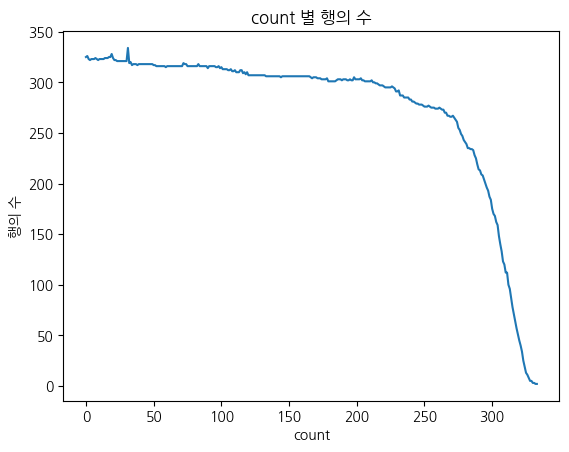

In [13]:
import koreanize_matplotlib
sns.lineplot(a)
plt.title('count 별 행의 수')
plt.xlabel('count')
plt.ylabel('행의 수')
plt.show()

In [14]:
pf=[]
for i in range(1, 335): 
    k = train[train['count']==i]
    per = len(k[k['passorfail']==1])/(len(k[k['passorfail']==0]) + len(k[k['passorfail']==1])) * 100
    pf.append(per)

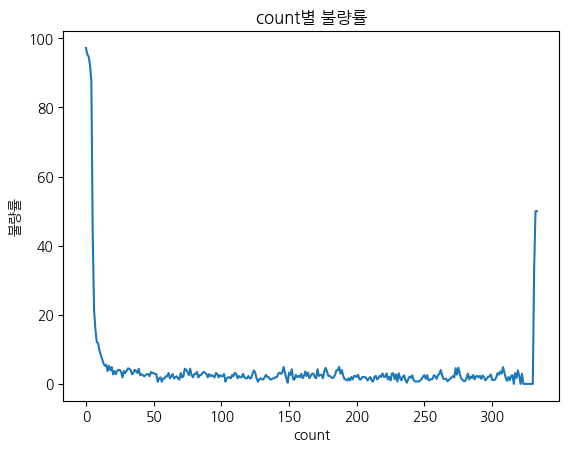

In [15]:
sns.lineplot(pf)
plt.title('count별 불량률')
plt.xlabel('count')
plt.ylabel('불량률')
plt.show()

## working(가동여부)
- passorfail의 유일한 NaN값이 있는 행이 working의 유일한 NaN값이 있는 행과 같음
- 이 행은 제거해도 될 듯

In [16]:
train['working'].unique()

array(['가동', '정지'], dtype=object)

In [17]:
train['working'].fillna('NaN').value_counts()

working
가동    91963
정지       51
Name: count, dtype: int64

In [18]:
train[train['working'].isna()]

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace


In [19]:
train[train['passorfail'].isna()]

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace


In [20]:
workstop_df = train[train['working']=='정지']
workstop_df['passorfail'].value_counts()
a = 96.07843137254902
# 불량률 : 96.07843137254902 %

In [21]:
workon_df = train[train['working']=='가동']
workon_df['passorfail'].value_counts()
b = 4.313691375879429
# 불량률 : 4.313691375879429 %

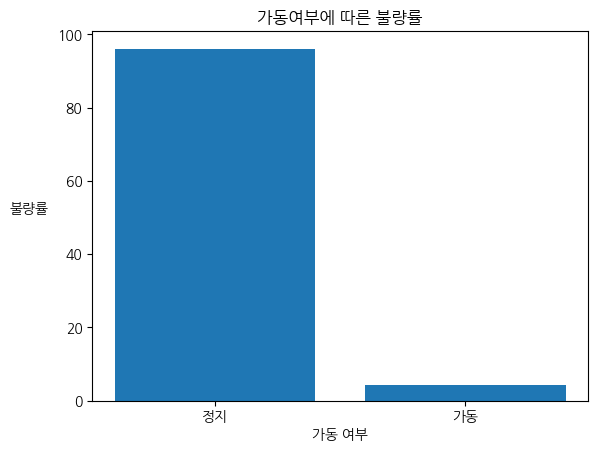

In [22]:
labels = ['정지', '가동']
values = [a, b]

# 그래프 그리기
plt.bar(labels, values)

# 그래프 제목과 축 레이블 설정
plt.title('가동여부에 따른 불량률')
plt.xlabel('가동 여부')
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

## emergency_stop(비상정지)
- ON 하나임
- 결측치가 하나있는데 working의 유일한 NaN값이 있는 행과 같음(제거됨)

In [23]:
train['emergency_stop'].value_counts()

emergency_stop
ON    92014
Name: count, dtype: int64

In [24]:
len(train)

92014

## molten_temp(용탕온도)
-  알루미늄의 경우 687℃가 적당하고, ±5.5℃ 이내로 관리 한다.
-  q1 - IQR로 이상치 대체

### 이상치

<Axes: >

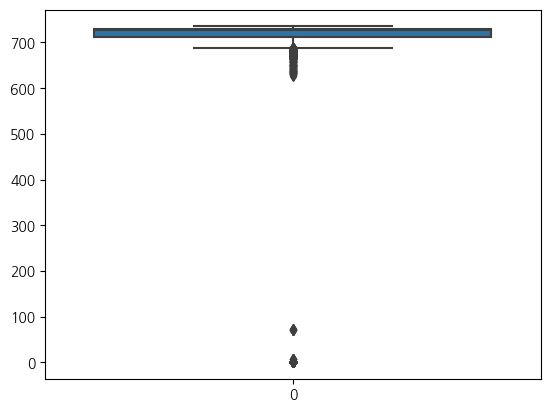

In [25]:
sns.boxplot(train['molten_temp'])

In [26]:
q25 = train['molten_temp'].quantile(0.25) - (train['molten_temp'].quantile(0.75) - train['molten_temp'].quantile(0.25))
q25

696.0

In [27]:
# 이상치 처리 25% - 알루미늄이 680도 정도에서 녹기때문
train['molten_temp'] = np.where(train['molten_temp'] < q25, q25, train['molten_temp'])

In [28]:
q75 = train['molten_temp'].quantile(0.75) + (train['molten_temp'].quantile(0.75) - train['molten_temp'].quantile(0.25))
q75

747.0

### 결측치

In [29]:
train['molten_temp'].isnull().sum()

2261

In [30]:
tempna_df = train[train['molten_temp'].isnull()]
tempna_df['passorfail'].value_counts()

passorfail
0.0    2197
1.0      64
Name: count, dtype: int64

In [31]:
tempna_df.head(2)
# 연속적으로 결측이 발생함
# 보간법 사용하면 될 듯

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
11895,11895,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,1:20:45,10,가동,ON,NaN,...,1449.0,478.0,687.0,35.0,23,2019-01-19 1:20,0.0,NaN,8412,NaN
11897,11897,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,1:22:35,11,가동,ON,NaN,...,1449.0,497.0,696.0,35.0,23,2019-01-19 1:22,0.0,NaN,8412,NaN


In [32]:
from scipy.interpolate import CubicSpline

# 결측치가 있는 행 선택
missing_rows = train['molten_temp'].isnull()

# 결측치가 아닌 행의 인덱스와 값 추출
known_indexes = train.index[~missing_rows]
known_values = train.loc[~missing_rows, 'molten_temp']

# 결측치가 아닌 행의 인덱스와 값을 리스트로 변환
known_indexes_list = known_indexes.tolist()
known_values_list = known_values.tolist()

# CubicSpline 객체 생성
cs = CubicSpline(known_indexes_list, known_values_list)

# 결측치를 보간한 값으로 채워주기
train.loc[missing_rows, 'molten_temp'] = cs(train.loc[missing_rows].index)

In [33]:
# 결측치 확인
train['molten_temp'].isnull().sum()

0

## 설비작동 사이클시간
- 112초를 기준으로 불량률에 차이가 있음
- 따라서, 범주형으로 바꾸면 될 듯

In [34]:
train.groupby(['passorfail']).agg(설비사이클시간평균=('facility_operation_cycleTime','mean'))
# 양불과는 관련이 없음

,설비사이클시간평균
passorfail,
0.0,121.568411
1.0,121.291584


<Axes: >

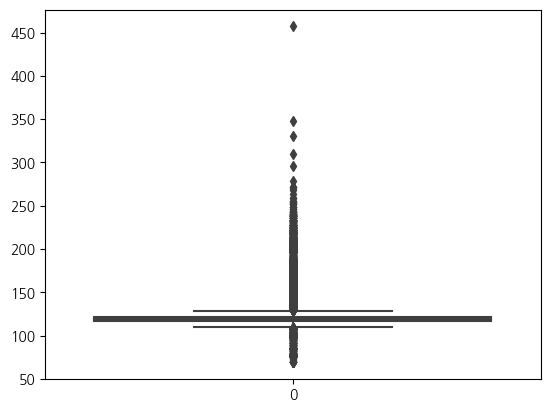

In [35]:
sns.boxplot(train['facility_operation_cycleTime'])

In [36]:
q1 = train['facility_operation_cycleTime'].quantile(0.25)
q3 = train['facility_operation_cycleTime'].quantile(0.75)
IQR = q3 - q1
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q25, q75

(109.5, 129.5)

In [37]:
a = train[train['facility_operation_cycleTime']<q25]
a['passorfail'].value_counts()
b = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100 


In [38]:
a = train[train['facility_operation_cycleTime']>=q25]
a['passorfail'].value_counts()

c = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100


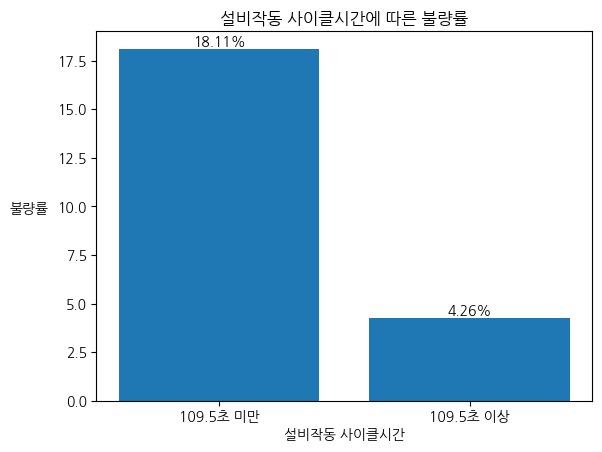

In [39]:
labels = ['109.5초 미만', '109.5초 이상']
values = [b, c]

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('설비작동 사이클시간에 따른 불량률')
plt.xlabel('설비작동 사이클시간')
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

## 제품생산 사이클시간
- 115초 기준으로 불량률에 차이가 있음
- 따라서, 범주형으로 바꾸면 될 듯

In [40]:
train['production_cycletime'].unique()

array([120, 125, 122, 123, 129, 182, 124, 121, 126, 135, 127, 156, 230,
       119, 128, 149, 151, 131, 130, 217, 154, 118,  82,  84,  87, 196,
       140, 229, 250, 205, 143, 300, 210, 200, 195, 226, 160, 204, 147,
       138, 209, 224, 231, 208, 163, 116, 207, 132, 215, 256, 211, 142,
       139, 137, 157, 206, 117, 201, 172, 134, 219, 153,  79,  80, 223,
       237, 222, 232, 170, 234, 214,  81, 202, 203, 141, 221, 240, 212,
       144, 161, 239, 236, 227, 244, 242,   0, 148, 225, 216, 133,  78,
       166, 136, 158, 159, 145, 253, 235, 220,  95, 246, 164, 233,  85,
        83, 252,  86, 180, 107, 173, 174, 393, 228,  91,  99,  94, 152,
       270, 191, 262, 265, 257, 261, 238, 241,  88, 266, 150, 361, 197,
       243, 259, 362, 363, 485, 254, 146, 375, 248, 245, 213, 298, 482,
       360,  77, 115, 114, 177, 198, 365, 364, 192, 199, 178, 188, 181,
       179, 162, 169, 194, 185, 247, 168, 113, 165, 155,  90, 189, 167,
       175, 186, 193, 176, 278, 183, 100,  92,  96, 190, 187, 18

In [41]:
train.groupby(['passorfail']).agg(설비사이클시간평균=('production_cycletime','mean'))
# 양불과는 관련이 없음

,설비사이클시간평균
passorfail,
0.0,122.737062
1.0,117.668825


<Axes: >

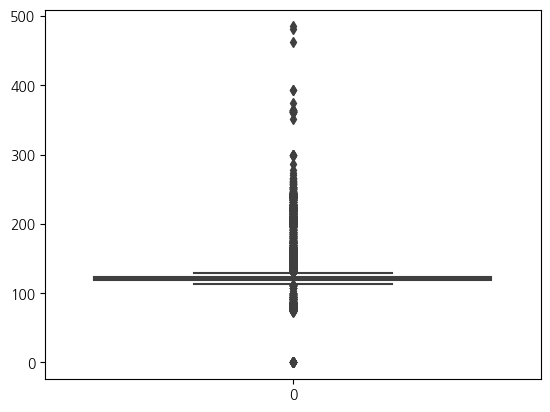

In [42]:
sns.boxplot(train['production_cycletime'])

In [43]:
q1 = train['production_cycletime'].quantile(0.25)
q3 = train['production_cycletime'].quantile(0.75)
IQR = q3 - q1
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q25, q75

(113.0, 129.0)

In [44]:
a = train[train['production_cycletime']>=q25]
a['passorfail'].value_counts()
c = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
# 불량률 5% 

In [45]:
a = train[train['production_cycletime']<q25]
d = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
# 불량률 45% 

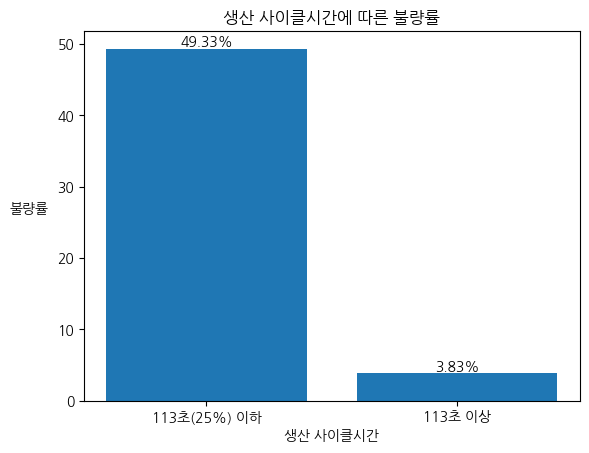

In [46]:
labels = ['113초(25%) 이하', '113초 이상']
values = [d, c]

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('생산 사이클시간에 따른 불량률')
plt.xlabel('생산 사이클시간')
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

### 이상치
- 제품생산 사이클시간이 0인 것의 불량률이 68% 이기 때문에 115초 이하인 데이터의 대표값으로 대체

In [47]:
train[train['production_cycletime']==0]['passorfail'].value_counts()
print('제품생산 사이클시간이 0인 데이터의 불량률 : ', train[train['production_cycletime']==0]['passorfail'].value_counts().values[0]/sum(train[train['production_cycletime']==0]['passorfail'].value_counts())*100)

제품생산 사이클시간이 0인 데이터의 불량률 :  68.0


In [48]:
train[train['production_cycletime']<=115]['production_cycletime'].mean()

95.87079831932773

In [49]:
train['production_cycletime'] = np.where(train['production_cycletime']==0, train[train['production_cycletime']<=115]['production_cycletime'].mean(), train['production_cycletime'])

## low_section_speed(저속구간속도)
- 설정한 범위에 따라 불량률이 다름
- 이것 또한 범주화 하기

In [50]:
train['low_section_speed'].describe()
# 저속구간속도가 110인 것이 67485개 1, 2, 3 분위수 모두 같음

count    92014.000000
mean       110.794999
std        305.181962
min          0.000000
25%        110.000000
50%        110.000000
75%        110.000000
max      65535.000000
Name: low_section_speed, dtype: float64

In [51]:
# 100미만일 때 불랼률 : 38.803263825929285
# 10이하일 때 불량률 : 5.6426332288401255 이기 때문에 범위를 아래 칸처럼 정함
ax110 = train[train['low_section_speed']<10]
ax110['passorfail'].value_counts()

print('저속구간속도 10미만일 때 불량률 :',  ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100)
a = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

저속구간속도 10미만일 때 불량률 : 5.6426332288401255


In [52]:
ax110 = train[(train['low_section_speed']<100) & (train['low_section_speed']>=10)]
ax110['passorfail'].value_counts()

print('저속구간속도 10이상, 100미만일 때 불량률 :',  ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100)
b = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

저속구간속도 10이상, 100미만일 때 불량률 : 47.704081632653065


In [53]:
ax110 = train[(train['low_section_speed']>=100) & (train['low_section_speed']<=150)]
ax110['passorfail'].value_counts()
print('저속구간속도 100이상, 150이하일 때 불량률 :',  ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100)
c = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

저속구간속도 100이상, 150이하일 때 불량률 : 3.669724770642202


In [54]:
ax110 = train[train['low_section_speed']>150]
ax110['passorfail'].value_counts()
print('저속구간속도 150이상일 때 불량률 :',  ax110['passorfail'].value_counts().values[0] / sum(ax110['passorfail'].value_counts().values)*100)
d = ax110['passorfail'].value_counts().values[0] / sum(ax110['passorfail'].value_counts().values)*100

저속구간속도 150이상일 때 불량률 : 100.0


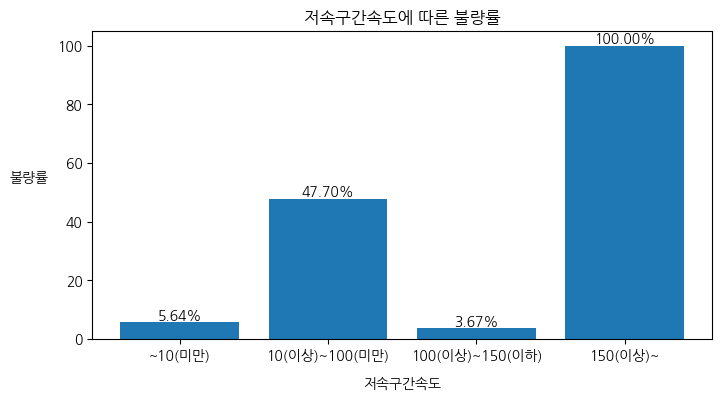

In [55]:
labels = ['~10(미만)', '10(이상)~100(미만)', '100(이상)~150(이하)', '150(이상)~']
values = [a, b, c, d]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('저속구간속도에 따른 불량률')
plt.xlabel('저속구간속도',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

### 이상치
- 60000이상일 때 모두 불량임
- 150 이상일 때 모두 불량이므로 150으로 대체

In [56]:
train['low_section_speed'] = np.where(train['low_section_speed']>=60000, 150, train['low_section_speed'])

## high_section_speed(고속구간속도)
- 90을 기준으로 불량률이 다름
- 이것도 범주화하면 됨

In [57]:
train['high_section_speed'].describe()

# 1, 2, 3분위수가 모두 같음

count    92014.000000
mean       112.624959
std         10.759272
min          0.000000
25%        112.000000
50%        112.000000
75%        112.000000
max        388.000000
Name: high_section_speed, dtype: float64

<Axes: xlabel='high_section_speed', ylabel='Count'>

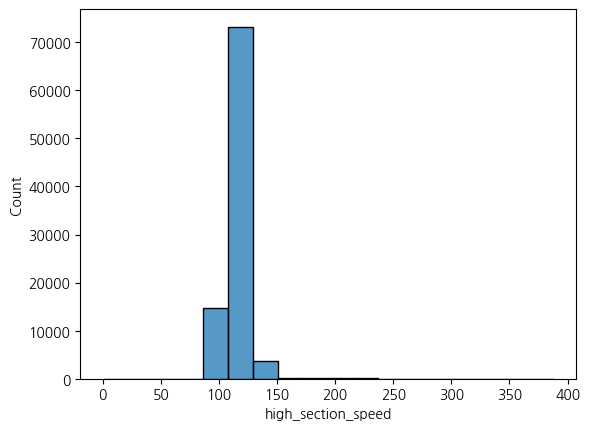

In [58]:
sns.histplot(train['high_section_speed'])

In [59]:
ax110 = train[(train['high_section_speed']<90)]
ax110['passorfail'].value_counts()

print('저속구간속도 90미만일 때 불량률 :',  ax110['passorfail'].value_counts().values[0] / sum(ax110['passorfail'].value_counts().values)*100)
a = ax110['passorfail'].value_counts().values[0] / sum(ax110['passorfail'].value_counts().values)*100

저속구간속도 90미만일 때 불량률 : 100.0


In [60]:
ax110 = train[(train['high_section_speed']>=90)]
ax110['passorfail'].value_counts()

print('저속구간속도 90미만일 때 불량률 :',  ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100)
b = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

저속구간속도 90미만일 때 불량률 : 4.337522285515502


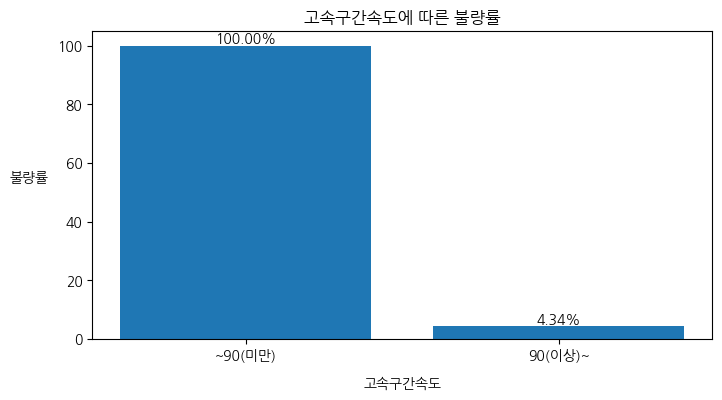

In [61]:
labels = ['~90(미만)', '90(이상)~']
values = [a, b]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('고속구간속도에 따른 불량률')
plt.xlabel('고속구간속도',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

## molten_volume(용탕량)
- 이상치는 양불과 관련이 없음
- 또한, 결측치 45130개이므로 해당 열 제거

In [62]:
train['molten_volume'].describe()

count    46884.000000
mean       154.977818
std        485.646011
min          0.000000
25%         49.000000
50%         67.000000
75%         85.000000
max       2767.000000
Name: molten_volume, dtype: float64

<Axes: >

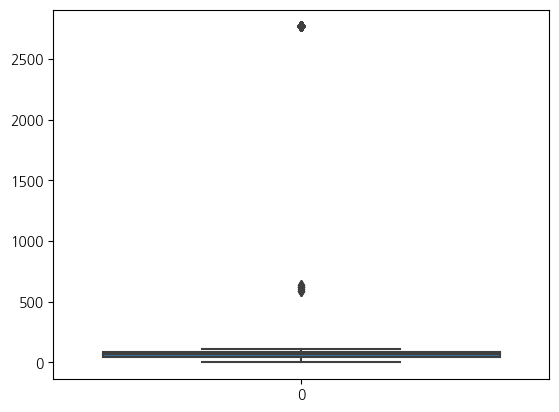

In [63]:
sns.boxplot(train['molten_volume'])

In [64]:
a500 = train[train['molten_volume']>=500]
a500['passorfail'].value_counts()

passorfail
0.0    1505
1.0      68
Name: count, dtype: int64

In [65]:
a500 = train[train['molten_volume']<500]
a500['passorfail'].value_counts()

passorfail
0.0    43215
1.0     2096
Name: count, dtype: int64

## cast pressure(주조압력)
- 300을 기준으로 불량률이 다름
- 굉장히 관련성이 높음

<Axes: >

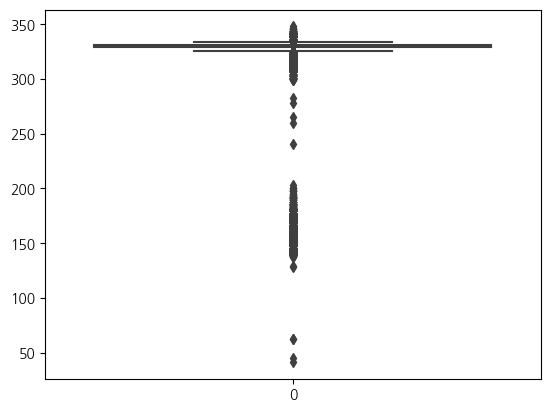

In [66]:
sns.boxplot(train['cast_pressure'])

In [67]:
q1 = train['cast_pressure'].quantile(0.25)
q3 = train['cast_pressure'].quantile(0.75)
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q25

323.0

In [68]:
a300 = train[train['cast_pressure']<300]
a300['passorfail'].value_counts()

print('주조압력 300이하일 때 불량률 :',  a300['passorfail'].value_counts().values[0] / sum(a300['passorfail'].value_counts().values)*100)
a = a300['passorfail'].value_counts().values[0] / sum(a300['passorfail'].value_counts().values)*100

주조압력 300이하일 때 불량률 : 98.93573475235367


In [69]:
a300 = train[train['cast_pressure']>=300]
a300['passorfail'].value_counts()

print('주조압력 300이상일 때 불량률 :',  a300['passorfail'].value_counts().values[1] / sum(a300['passorfail'].value_counts().values)*100)
b = a300['passorfail'].value_counts().values[1] / sum(a300['passorfail'].value_counts().values)*100

주조압력 300이상일 때 불량률 : 1.785176005626821


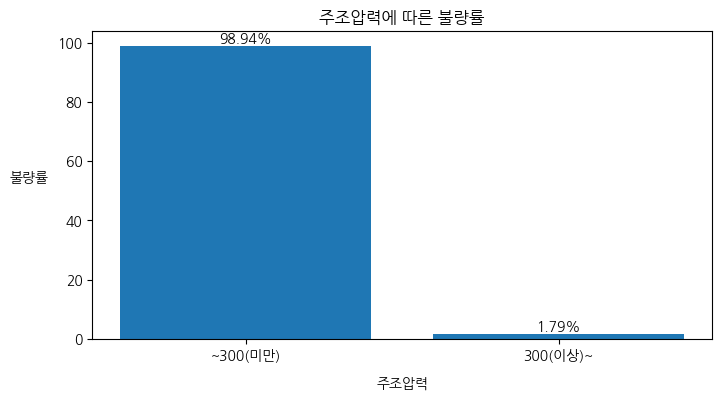

In [70]:
labels = ['~300(미만)', '300(이상)~']
values = [a, b]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('주조압력에 따른 불량률')
plt.xlabel('주조압력',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

## 비스켓 두께

<Axes: >

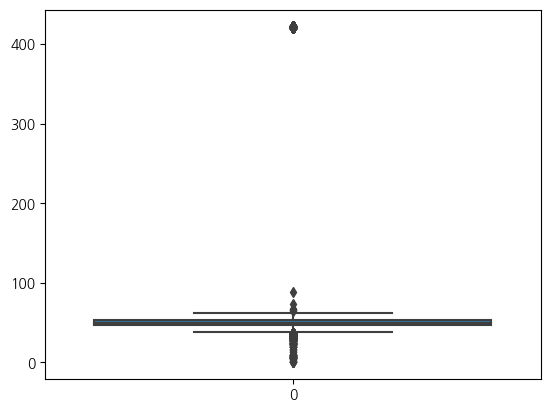

In [71]:
sns.boxplot(train['biscuit_thickness'])

In [72]:
q1 = train['biscuit_thickness'].quantile(0.25)
q3 = train['biscuit_thickness'].quantile(0.75)
IQR = q3 - q1
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q75

62.0

In [73]:
a100 = train[(train['biscuit_thickness']>q75)]
a100['passorfail'].value_counts()

print('비스켓 두께 59초과일 때 불량률 :',  a100['passorfail'].value_counts().values[0] / sum(a100['passorfail'].value_counts().values)*100)
a = a100['passorfail'].value_counts().values[0] / sum(a100['passorfail'].value_counts().values)*100


비스켓 두께 59초과일 때 불량률 : 100.0


In [74]:
a100 = train[train['biscuit_thickness']<=q75]
a100['passorfail'].value_counts()

print('비스켓 두께 59이하일 때 불량률 :',  a100['passorfail'].value_counts().values[1] / sum(a100['passorfail'].value_counts().values)*100)
b = a100['passorfail'].value_counts().values[1] / sum(a100['passorfail'].value_counts().values)*100

비스켓 두께 59이하일 때 불량률 : 4.145788854516143


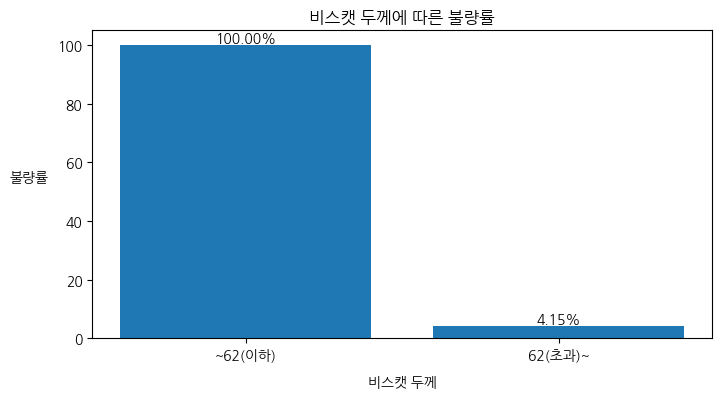

In [75]:
labels = ['~62(이하)', '62(초과)~']
values = [a, b]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('비스캣 두께에 따른 불량률')
plt.xlabel('비스캣 두께',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

## upper mold temp(상금형온도)
-  count가 새로 reset 되면 같이 reset 됨

### upper 1
- 100보다 낮을수록 불량률이 낮아짐
- 또한, 1400도 넘는 것이 한 개이므로 제거

<Axes: >

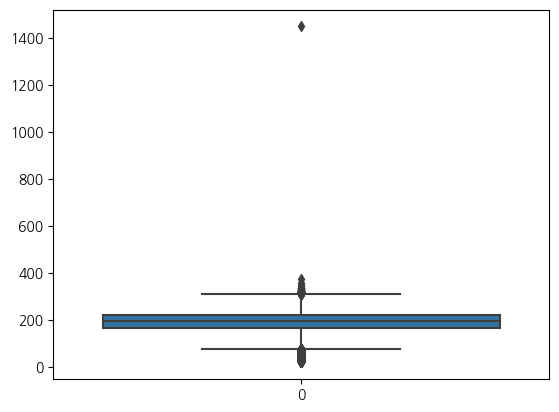

In [76]:
sns.boxplot(train['upper_mold_temp1'])

In [77]:
q1 = train['upper_mold_temp1'].quantile(0.25)
q3 = train['upper_mold_temp1'].quantile(0.75)
IQR = q3 - q1
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q25

74.5

In [78]:
a = train[train['upper_mold_temp1']<100]
a['passorfail'].value_counts()

b = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100

In [79]:
a = train[train['upper_mold_temp1']>=100]
a['passorfail'].value_counts()

c = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100

In [80]:
a = train[train['upper_mold_temp1']<80]
d = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100

In [81]:
a = train[train['upper_mold_temp1']<60]
e = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100

In [82]:
a = train[train['upper_mold_temp1']<40]
f = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100

In [83]:
a = train[train['upper_mold_temp1']<20]
g = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100

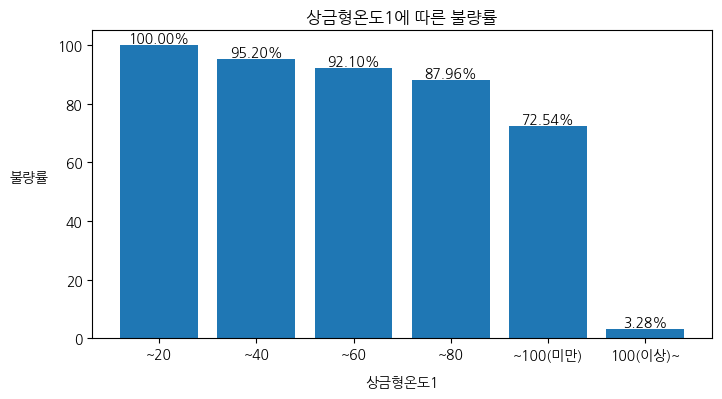

In [84]:
labels = ['~20','~40', '~60', '~80','~100(미만)', '100(이상)~']
values = [g, f, e, d, b, c]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('상금형온도1에 따른 불량률')
plt.xlabel('상금형온도1',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

In [85]:
# 한 행 제거
train = train.drop(train[train['upper_mold_temp1']>1400].index, axis=0)

### upper 2
- 4000이 넘는 이상치 1개의 행 제거
- 80을 기준으로 양품이 더 많아짐
- 또한, 80보다 작아질수록 불량률이 증가함

In [86]:
train = train.drop(train[train['upper_mold_temp2']>4000].index, axis=0)

<Axes: >

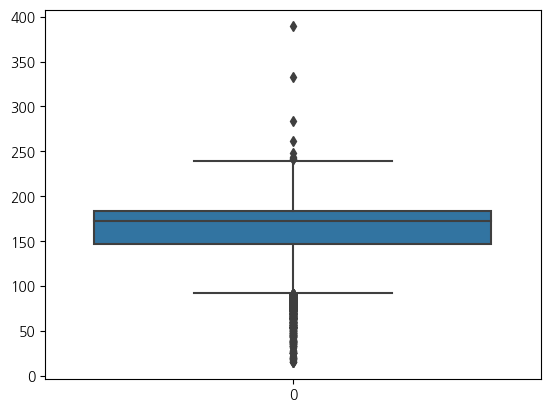

In [87]:
sns.boxplot(train['upper_mold_temp2'])

In [88]:
q1 = train['upper_mold_temp2'].quantile(0.25)
q3 = train['upper_mold_temp2'].quantile(0.75)
IQR = q3 - q1
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q75

239.5

In [89]:
a = train[train['upper_mold_temp2']>=q75]
a['passorfail'].value_counts()
b = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100

In [90]:
a = train[(train['upper_mold_temp2']>=80) & (train['upper_mold_temp2']<q75)]
a['passorfail'].value_counts()
c = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100

In [91]:
a = train[train['upper_mold_temp2']<80]
a['passorfail'].value_counts()
d = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
d

46.80534918276374

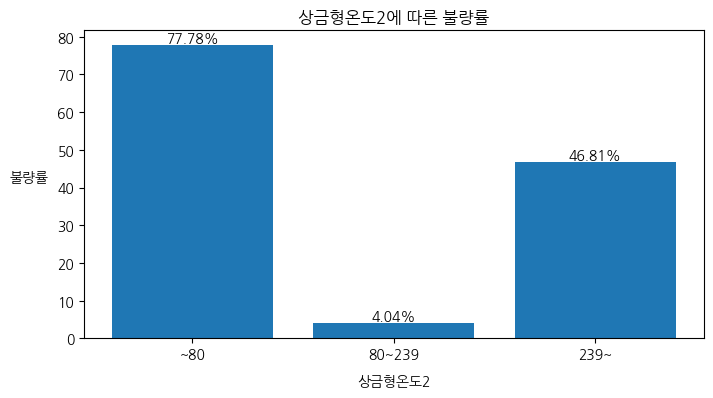

In [92]:
labels = ['~80', '80~239', '239~']
values = [b, c, d]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('상금형온도2에 따른 불량률')
plt.xlabel('상금형온도2',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

### upper 3 (결측치 처리)
- 1, 2와는 다르게 양불과 관련없음

In [93]:
from scipy.interpolate import CubicSpline 

# 결측치가 있는 행 선택
missing_rows = train['upper_mold_temp3'].isnull()

# 결측치가 아닌 행의 인덱스와 값 추출
known_indexes = train.index[~missing_rows]
known_values = train.loc[~missing_rows, 'upper_mold_temp3']

# 결측치가 아닌 행의 인덱스와 값을 리스트로 변환
known_indexes_list = known_indexes.tolist()
known_values_list = known_values.tolist()

# CubicSpline 객체 생성
cs = CubicSpline(known_indexes_list, known_values_list)

# 결측치를 보간한 값으로 채워주기
train.loc[missing_rows, 'upper_mold_temp3'] = cs(train.loc[missing_rows].index)

## lower mold temp (하금형온도)

### lower 1
- 온도가 내려갈수록 불량률이 증가함

<Axes: >

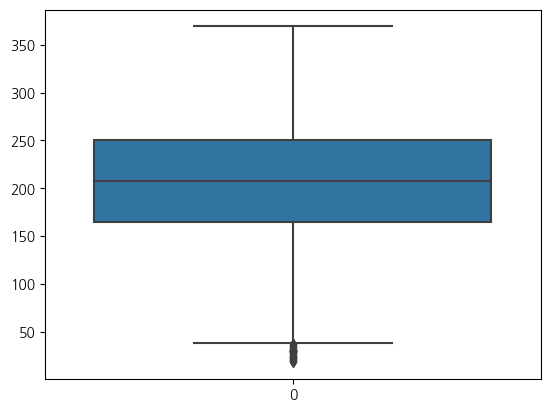

In [94]:
sns.boxplot(train['lower_mold_temp1'])

In [95]:
q1 = train['lower_mold_temp1'].quantile(0.25)
q3 = train['lower_mold_temp1'].quantile(0.75)
IQR = q3 - q1
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q25

37.5

In [96]:
a = train[train['lower_mold_temp1']<50]
b = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100
b

98.30508474576271

In [97]:
a = train[train['lower_mold_temp1']<80]
c = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100
c

90.25270758122743

In [98]:
a = train[train['lower_mold_temp1']<100]
a['passorfail'].value_counts()

d = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
d

33.85059545290508

In [99]:
a = train[train['lower_mold_temp1']<150]
a['passorfail'].value_counts()

e = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
e

13.290163428923835

In [100]:
a = train[train['lower_mold_temp1']<250]
a['passorfail'].value_counts()

f = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
f

5.489204661029262

In [101]:
a = train[train['lower_mold_temp1']>=250]
a['passorfail'].value_counts()

g = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
g

1.0178556025187613

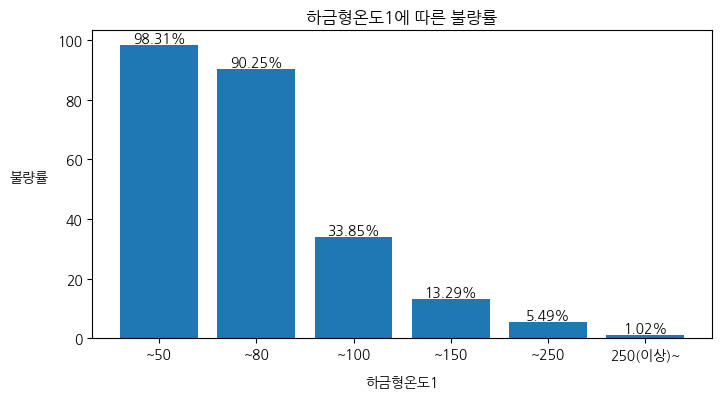

In [102]:
labels = ['~50','~80', '~100', '~150','~250', '250(이상)~']
values = [b,c,d,e,f,g]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('하금형온도1에 따른 불량률')
plt.xlabel('하금형온도1',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

### lower 2

<Axes: >

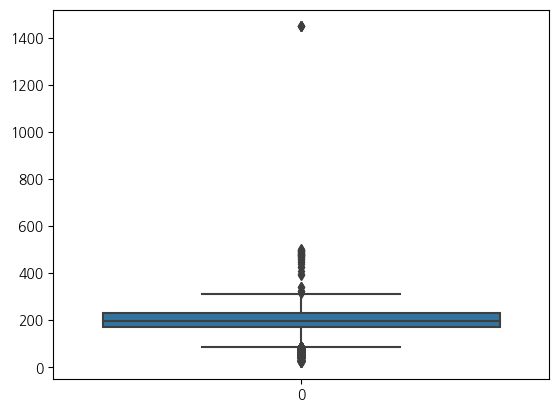

In [103]:
sns.boxplot(train['lower_mold_temp2'])

In [104]:
q1 = train['lower_mold_temp2'].quantile(0.25)
q3 = train['lower_mold_temp2'].quantile(0.75)
IQR = q3 - q1
q25 = q1 - IQR*1.5
q75 = q3 + IQR*1.5
q25, q75

(86.5, 314.5)

In [105]:
train[train['lower_mold_temp2']>q75]['passorfail'].value_counts()

passorfail
1.0    20
0.0    17
Name: count, dtype: int64

In [106]:
a = train[train['lower_mold_temp2']>q75]
a['passorfail'].value_counts()
b = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100
b

54.054054054054056

In [107]:
a = train[train['lower_mold_temp2']<q25]
a['passorfail'].value_counts()
c = a['passorfail'].value_counts().values[0] / sum(a['passorfail'].value_counts().values)*100
c

53.92809587217043

In [108]:
a = train[(train['lower_mold_temp2']>=q25) & (train['lower_mold_temp2']<=q75)]
a['passorfail'].value_counts()
d = a['passorfail'].value_counts().values[1] / sum(a['passorfail'].value_counts().values)*100
d

3.9342716828904676

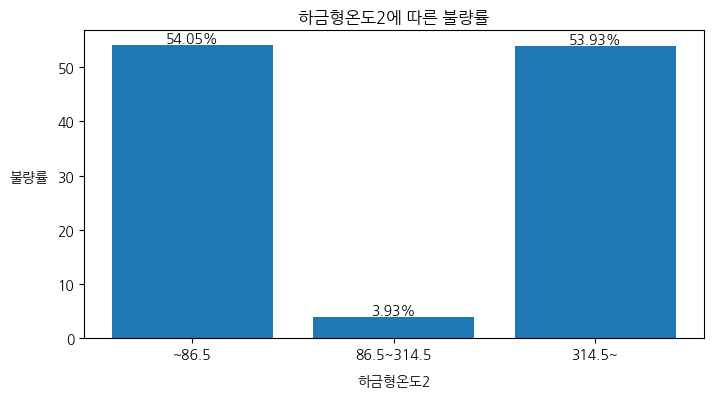

In [109]:
labels = ['~86.5','86.5~314.5', '314.5~']
values = [b,d,c]

fig = plt.figure(figsize=(8,4))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('하금형온도2에 따른 불량률')
plt.xlabel('하금형온도2',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

### lower 3 (이상치, 결측치 처리)
- 60000넘는 이상치를 최빈값으로 대체
- 결측치 보간법 대체

<Axes: >

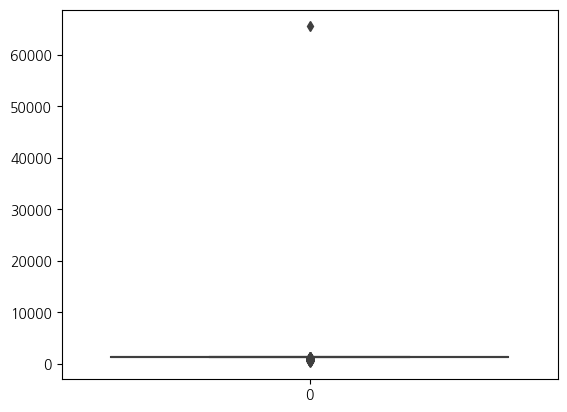

In [110]:
sns.boxplot( train['lower_mold_temp3'])

In [111]:
# 60000넘는 이상치를 최빈값으로 대체
train.loc[train[train['lower_mold_temp3']>2000].index,'lower_mold_temp3'] = train['lower_mold_temp3'].mode()

In [112]:
from scipy.interpolate import CubicSpline 

# 결측치가 있는 행 선택
missing_rows = train['lower_mold_temp3'].isnull()

# 결측치가 아닌 행의 인덱스와 값 추출
known_indexes = train.index[~missing_rows]
known_values = train.loc[~missing_rows, 'lower_mold_temp3']

# 결측치가 아닌 행의 인덱스와 값을 리스트로 변환
known_indexes_list = known_indexes.tolist()
known_values_list = known_values.tolist()

# CubicSpline 객체 생성
cs = CubicSpline(known_indexes_list, known_values_list)

# 결측치를 보간한 값으로 채워주기
train.loc[missing_rows, 'lower_mold_temp3'] = cs(train.loc[missing_rows].index)

## physical_strength(형체력)

<Axes: >

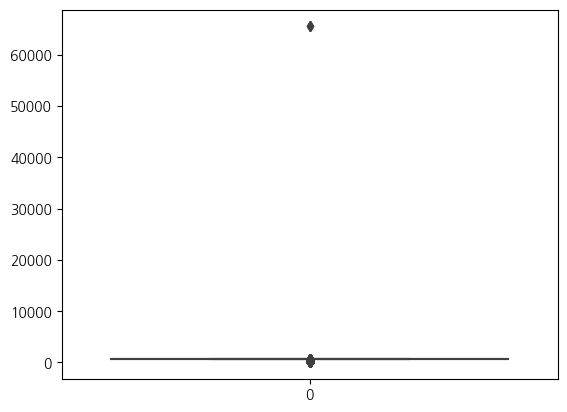

In [113]:
sns.boxplot(train['physical_strength'])

In [114]:
train[train['physical_strength']>=60000]

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
6000,6000,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-11,22:55:42,74,가동,ON,696.000000,...,1449.0,456.0,65535.0,29.0,23,2019-01-11 22:55,1.0,NaN,8412,NaN
11811,11811,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-18,23:19:22,5,가동,ON,709.000000,...,1449.0,437.0,65535.0,31.0,23,2019-01-18 23:19,1.0,NaN,8412,NaN
17598,17598,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-24,7:59:34,1,가동,ON,717.029109,...,1449.0,496.0,65535.0,40.0,23,2019-01-24 7:59,1.0,NaN,8412,NaN


In [115]:
train['physical_strength'] = np.where(train['physical_strength']>=60000, 
                                      train[(train['passorfail']==1) & (train['mold_code']==8412)]['physical_strength'].median(), train['physical_strength'])

## 냉각수 온도

<Axes: >

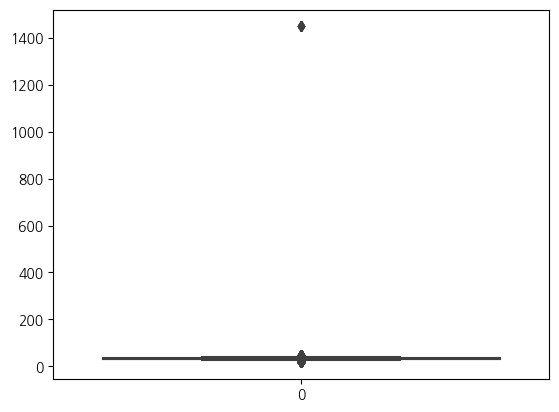

In [116]:
sns.boxplot(train['Coolant_temperature'])

In [117]:
train[train['Coolant_temperature']>1400]
# 금형코드가 모두 8412이고 count가 1부터 9까지 있으며 5부터 양임
# 상금형온도는 count가 커질수록 증가함
# 상금형온도 1은 100부터, 2는 70부터, 3은 모두 1449
# 하금형온도 1은 136부터, 2는 123부터 3은 모두 1449
# 냉각수 온도는 모두 같은데 금형온도가 커질수록 양이다

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
11853,11853,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:07:38,1,가동,ON,709.0,...,1449.0,445.0,668.0,1449.0,23,2019-01-19 0:07,1.0,NaN,8412,NaN
11855,11855,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:09:45,2,가동,ON,709.0,...,1449.0,473.0,695.0,1449.0,23,2019-01-19 0:09,1.0,NaN,8412,NaN
11857,11857,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:11:44,3,가동,ON,709.0,...,1449.0,487.0,693.0,1449.0,23,2019-01-19 0:11,1.0,NaN,8412,NaN
11861,11861,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:18:45,4,가동,ON,709.0,...,1449.0,469.0,678.0,1449.0,23,2019-01-19 0:18,1.0,NaN,8412,NaN
11862,11862,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:20:48,5,가동,ON,709.0,...,1449.0,479.0,698.0,1449.0,23,2019-01-19 0:20,0.0,NaN,8412,NaN
11864,11864,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:22:49,6,가동,ON,709.0,...,1449.0,486.0,710.0,1449.0,23,2019-01-19 0:22,0.0,NaN,8412,NaN
11866,11866,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:24:58,7,가동,ON,709.0,...,1449.0,489.0,685.0,1449.0,23,2019-01-19 0:24,0.0,NaN,8412,NaN
11868,11868,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:26:49,8,가동,ON,709.0,...,1449.0,490.0,708.0,1449.0,23,2019-01-19 0:26,0.0,NaN,8412,NaN
11870,11870,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:29:02,9,가동,ON,709.0,...,1449.0,489.0,698.0,1449.0,23,2019-01-19 0:29,0.0,NaN,8412,NaN


In [118]:
train.iloc[11870:11899,:]

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
11870,11870,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:29:02,9,가동,ON,709.000000,...,1449.0,489.0,698.0,1449.0,23,2019-01-19 0:29,0.0,NaN,8412,NaN
11871,11871,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:31:39,124,가동,ON,715.000000,...,1449.0,472.0,709.0,33.0,23,2019-01-19 0:31,0.0,NaN,8573,B
11872,11872,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:32:11,125,가동,ON,715.000000,...,1449.0,478.0,709.0,33.0,23,2019-01-19 0:32,0.0,NaN,8573,B
11873,11873,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:34:12,126,가동,ON,714.000000,...,1449.0,479.0,712.0,33.0,23,2019-01-19 0:34,0.0,NaN,8573,B
11874,11874,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:38:12,127,가동,ON,713.000000,...,1449.0,445.0,701.0,33.0,23,2019-01-19 0:38,0.0,NaN,8573,B
11875,11875,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:40:19,128,가동,ON,713.000000,...,1449.0,461.0,712.0,33.0,23,2019-01-19 0:40,0.0,NaN,8573,B
11876,11876,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:42:20,129,가동,ON,712.000000,...,1449.0,469.0,708.0,34.0,23,2019-01-19 0:42,0.0,NaN,8573,B
11877,11877,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:44:28,130,가동,ON,710.000000,...,1449.0,474.0,713.0,33.0,23,2019-01-19 0:44,0.0,NaN,8573,B
11878,11878,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:46:28,131,가동,ON,709.000000,...,1449.0,474.0,715.0,34.0,23,2019-01-19 0:46,0.0,NaN,8573,B
11879,11879,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-19,0:48:26,132,가동,ON,709.000000,...,1449.0,476.0,704.0,33.0,23,2019-01-19 0:48,0.0,NaN,8573,B


## mold_code(금형코드)
- count가 7 미만이면 공정 조건이 비슷하지만
- 7 초과이면 공정 조건이 금형 코드마다 다름
---
- 금형마다 불량률이 비슷함
- 따라서, 불량의 원인은 금형이 아님
---
-  평균이 비슷한 거 : molten_temp(700초반), facility_operation_cycleTime(120초반), production_cycletime(120초반), low_section_speed(100초반), high_section_speed(100초반),  
        cast_pressure(320초반), biscuit_thickness(40후반~50초반), upper_mold_temp1, 2, lower_mold_temp1, 2, 3, physical_strength(700언저리), Coolant_temperature(30초)
- 평균이 다른 거 : upper_mold_temp3(8573금형 : 200도, 나머지 1400 이상), sleeve_temperature(100~500 다양함), EMS_operation_time(8576 : 3초)

In [119]:
train.columns

Index(['Unnamed: 0', 'line', 'name', 'mold_name', 'time', 'date', 'count',
       'working', 'emergency_stop', 'molten_temp',
       'facility_operation_cycleTime', 'production_cycletime',
       'low_section_speed', 'high_section_speed', 'molten_volume',
       'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1',
       'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1',
       'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature',
       'physical_strength', 'Coolant_temperature', 'EMS_operation_time',
       'registration_time', 'passorfail', 'tryshot_signal', 'mold_code',
       'heating_furnace'],
      dtype='object')

In [120]:
for i in train['mold_code'].unique():
    print(f'{i}금형의 슬리브 온도 요약통계')
    print(train[train['mold_code'] == i]['sleeve_temperature'].describe())
    print('='*60)

8722금형의 슬리브 온도 요약통계
count    20048.000000
mean       461.150888
std         79.877798
min         27.000000
25%        450.000000
50%        472.000000
75%        489.000000
max       1276.000000
Name: sleeve_temperature, dtype: float64
8412금형의 슬리브 온도 요약통계
count    21471.000000
mean       379.860789
std        136.385145
min         24.000000
25%        201.000000
50%        428.000000
75%        492.000000
max        583.000000
Name: sleeve_temperature, dtype: float64
8573금형의 슬리브 온도 요약통계
count    9596.000000
mean      495.017299
std        56.285146
min       131.000000
25%       476.000000
50%       479.000000
75%       535.000000
max       605.000000
Name: sleeve_temperature, dtype: float64
8917금형의 슬리브 온도 요약통계
count    31110.000000
mean       401.042044
std        118.875637
min         23.000000
25%        361.000000
50%        435.000000
75%        479.000000
max       1449.000000
Name: sleeve_temperature, dtype: float64
8600금형의 슬리브 온도 요약통계
count    2960.000000
mean      499.49594

In [121]:
for i in train['mold_code'].unique():
    print(f'{i}금형의 불량률 :', train[train['mold_code'] == i]['passorfail'].value_counts().values[1] / sum(train[train['mold_code'] == i]['passorfail'].value_counts().values)*100)

# 금형마다 불량률이 비슷함
# 따라서, 불량의 원인은 금형이 아님

8722금형의 불량률 : 5.426975259377494
8412금형의 불량률 : 3.465139024731032
8573금형의 불량률 : 4.376823676531888
8917금형의 불량률 : 4.326583092253295
8600금형의 불량률 : 5.0675675675675675
8413금형의 불량률 : 3.7454424925422605
8576금형의 불량률 : 5.044136191677175


In [122]:
for i in train['mold_code'].unique():
    print(f'{i}금형 갯수 :', sum(train[train['mold_code'] == i]['passorfail'].value_counts()))

8722금형 갯수 : 20048
8412금형 갯수 : 21471
8573금형 갯수 : 9596
8917금형 갯수 : 31110
8600금형 갯수 : 2960
8413금형 갯수 : 6034
8576금형 갯수 : 793


In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92012 entries, 0 to 92014
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    92012 non-null  int64  
 1   line                          92012 non-null  object 
 2   name                          92012 non-null  object 
 3   mold_name                     92012 non-null  object 
 4   time                          92012 non-null  object 
 5   date                          92012 non-null  object 
 6   count                         92012 non-null  int64  
 7   working                       92012 non-null  object 
 8   emergency_stop                92012 non-null  object 
 9   molten_temp                   92012 non-null  float64
 10  facility_operation_cycleTime  92012 non-null  int64  
 11  production_cycletime          92012 non-null  float64
 12  low_section_speed             92012 non-null  float64
 13  high_s

# 열 삭제

In [124]:

remove_col = ['Unnamed: 0', 'line', 'name', 'mold_name', 'time', 'date', 'emergency_stop',
              'molten_volume', 'tryshot_signal', 'heating_furnace', 'registration_time']
train.drop(remove_col, axis=1 , inplace=True)

# 범주화

In [125]:
train_notcat = train.copy()
train_cat = train.copy()

## 범주화 안 한거

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_notcat['working'] = le.fit_transform(train_notcat['working'])

## 범주화 한거

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_cat['working'] = le.fit_transform(train_cat['working'])

In [128]:
cat_cols = ['facility_operation_cycleTime', 'production_cycletime', 'high_section_speed',
           'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1', 'lower_mold_temp1',]

threshold = [109.5, 113, 90, 300, 62,  80, 80]

def categorize_col(df, cat_cols, threshold):
    for i in range(len(cat_cols)):
        df[cat_cols[i]] = np.where(df[cat_cols[i]] < threshold[i], 0, 1)
        
    df['low_section_speed'] = np.where(df['low_section_speed']<10, 0, 
                                      np.where(df['low_section_speed']<100, 1,
                                              np.where(df['low_section_speed']<150, 2, 3)))
    df['upper_mold_temp2'] = np.where(df['upper_mold_temp2']<80, 0,
                                     np.where(df['upper_mold_temp2']<239, 1, 2))
    df['lower_mold_temp2'] = np.where(df['lower_mold_temp2']<86.5, 0,
                                     np.where(df['lower_mold_temp2']<314.5, 1, 2))
    
                                       
    return df
train_cat = categorize_col(train_cat, cat_cols=cat_cols, threshold=threshold)

In [129]:
train_cat.head()

,count,working,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,0,731.0,1,1,2,1,1,0,1,...,1449.0,1,2,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,0,720.0,0,1,2,1,1,0,1,...,1449.0,1,1,1449.0,481.0,0.0,30.0,25,0.0,8412
2,244,0,721.0,0,1,2,1,1,0,1,...,1449.0,1,1,1449.0,481.0,0.0,30.0,25,0.0,8412
3,245,0,721.0,0,1,2,1,1,0,1,...,1449.0,1,1,1449.0,483.0,0.0,30.0,25,0.0,8412
4,246,0,721.0,0,1,2,1,1,0,1,...,1449.0,1,1,1449.0,486.0,0.0,30.0,25,0.0,8412


# 불균형 데이터 해결 (smote)

In [130]:
from imblearn.over_sampling import SMOTE

X_notcat = train_notcat.drop('passorfail',axis=1)
y_notcat = train_notcat['passorfail']

sm = SMOTE(random_state=42)
X_res_notcat, y_res_notcat = sm.fit_resample(X_notcat, y_notcat)

In [131]:
X_cat = train_cat.drop('passorfail',axis=1)
y_cat = train_cat['passorfail']

sm = SMOTE(random_state=42)
X_res_cat, y_res_cat = sm.fit_resample(X_cat, y_cat)

# 모델링
- 금형 코드마다 하는 모델과 전체 데이터 모델

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score

## 전체 데이터에 대해서
- 범주화 안 한 것이 한 것보다 정확도가 더 높음

### 범주화 안 한 거

In [133]:
x_train, x_val, y_train, y_val = train_test_split(X_res_notcat, y_res_notcat, random_state=42, 
                                                  test_size=0.2, stratify=y_res_notcat)

rf = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=7)
rf.fit(x_train, y_train)

pred_train = rf.predict(x_train)
pred_val = rf.predict(x_val)

print('train 정확도 : ',accuracy_score(y_train, pred_train))
print('test 정확도 : ', accuracy_score(y_val, pred_val))

train 정확도 :  0.9581451177590272
test 정확도 :  0.9570738636363636


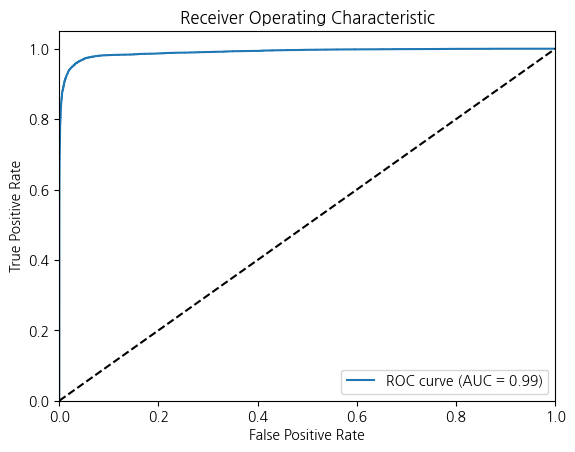

In [146]:
y_val_score = rf.predict_proba(x_val)[:, 1]

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_val, y_val_score)
auc = roc_auc_score(y_val, y_val_score)

# ROC 커브 시각화
plt.plot(fpr, tpr, label='ROC curve (AUC = {:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Validation Confusion Matrix')

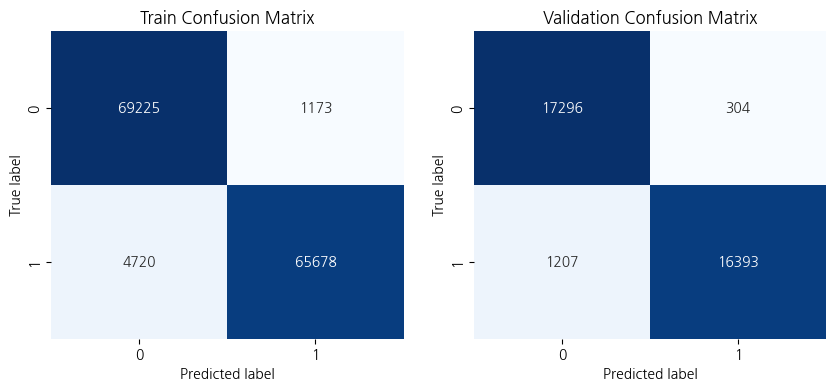

In [143]:
# 혼동 행렬 계산
train_cm = confusion_matrix(y_train, pred_train)
val_cm = confusion_matrix(y_val, pred_val)

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 훈련 세트 혼동 행렬 시각화
sns.heatmap(train_cm, annot=True, fmt='2.0f', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[0].set_title('Train Confusion Matrix')

# 검증 세트 혼동 행렬 시각화
sns.heatmap(val_cm, annot=True, fmt='2.0f', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')
axes[1].set_title('Validation Confusion Matrix')

### 범주화 한 거

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

x_train, x_val, y_train, y_val = train_test_split(X_res_cat, y_res_cat, random_state=42, 
                                                  test_size=0.3, stratify=y_res_cat)

rf = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=7)
rf.fit(x_train, y_train)

pred_train = rf.predict(x_train)
pred_val = rf.predict(x_val)

print('train 정확도 : ',accuracy_score(y_train, pred_train))
print('test 정확도 : ', accuracy_score(y_val, pred_val))

train 정확도 :  0.9298521879591224
test 정확도 :  0.9283509157370404


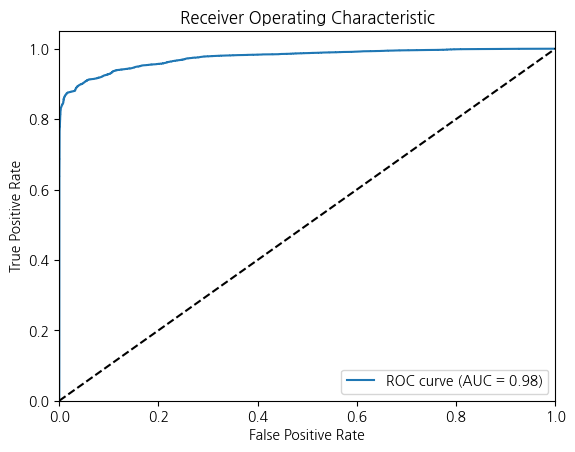

In [151]:
y_val_score = rf.predict_proba(x_val)[:, 1]

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_val, y_val_score)
auc = roc_auc_score(y_val, y_val_score)

# ROC 커브 시각화
plt.plot(fpr, tpr, label='ROC curve (AUC = {:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Validation Confusion Matrix')

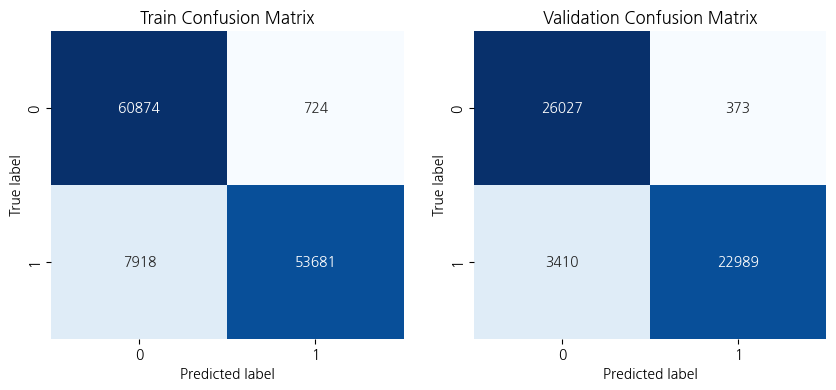

In [152]:
# 혼동 행렬 계산
train_cm = confusion_matrix(y_train, pred_train)
val_cm = confusion_matrix(y_val, pred_val)

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 훈련 세트 혼동 행렬 시각화
sns.heatmap(train_cm, annot=True, fmt='2.0f', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[0].set_title('Train Confusion Matrix')

# 검증 세트 혼동 행렬 시각화
sns.heatmap(val_cm, annot=True, fmt='2.0f', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')
axes[1].set_title('Validation Confusion Matrix')

In [ ]:
# # 스케일링 안한 것
# train 정확도 :  0.9201522764353028
# test 정확도 :  0.9189757381768594
    
    
# # 스케일링 한 것
# train 정확도 :  0.9201522764353028
# test 정확도 :  0.9189567984242126
    
# # 따라서, 트리기반 모델은 스케일링이 의미가 없음